In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

file_path = "../Data/Advertising.csv"

df = pd.read_csv(file_path)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [133]:
df.describe()

df.drop(columns="Unnamed: 0", inplace= True)

In [134]:
df.shape

(200, 4)

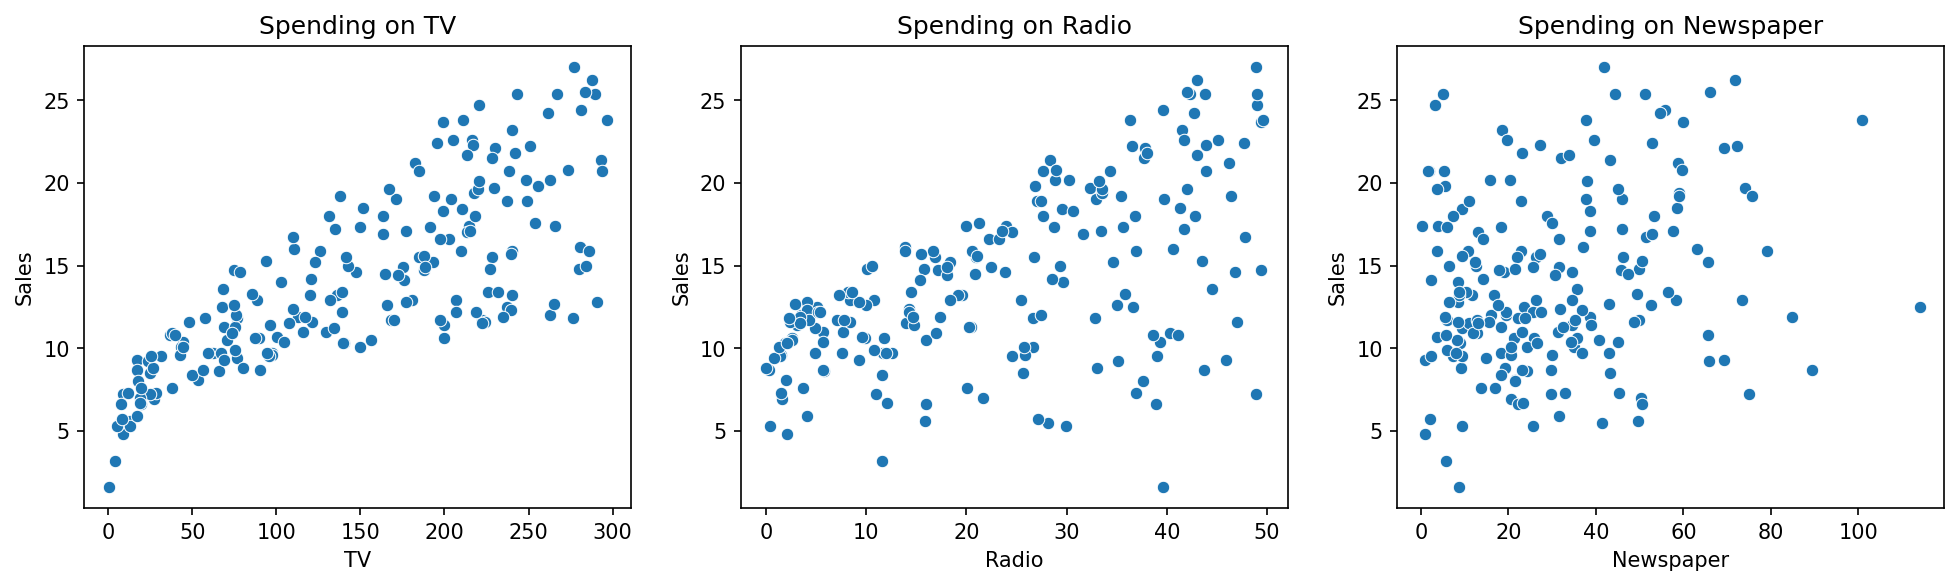

In [135]:
number_features = df.shape[1]-1

fig, ax = plt.subplots(1, number_features, figsize= (16,4), dpi= 150)

for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data= df, x= feature, y= "Sales", ax= ax[i])
    ax[i].set_title(f"Spending on {feature}")

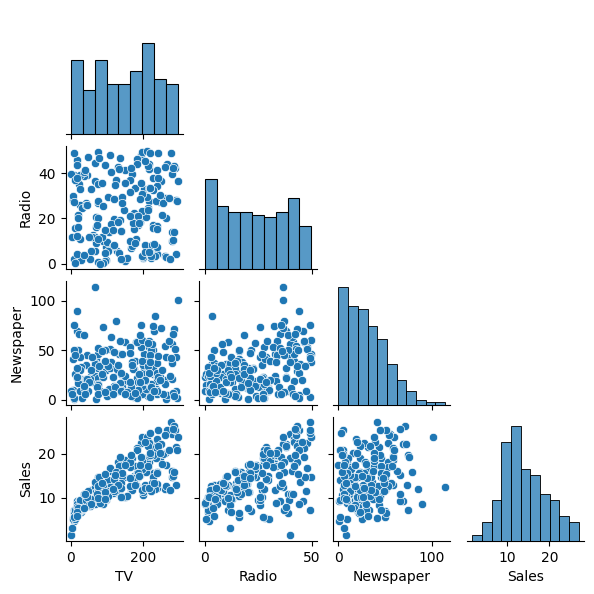

In [136]:
ax = sns.pairplot(df, height= 1.5, corner= True)

## Simple linear regression

In [137]:
X, y = df["TV"], df["Sales"]

X

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [138]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [139]:
beta_1, beta_0 = np.polyfit(X, y, deg=1)
print(beta_1, beta_0)

0.047536640433019736 7.032593549127697


Text(0.5, 1.0, 'Regression line of TV ad sales')

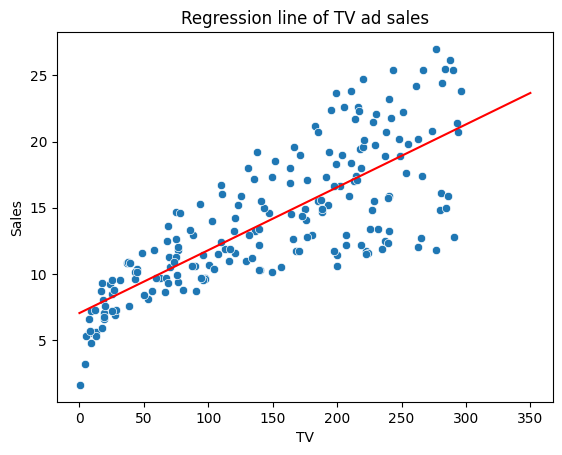

In [140]:
y_hat = lambda x: beta_0 + beta_1*x

spending = np.linspace(0, 350)

ax = sns.scatterplot(data= df, x= "TV", y= "Sales")
sns.lineplot(x= spending, y= y_hat(spending), color= "red")
ax.set_title("Regression line of TV ad sales")

<AxesSubplot: xlabel='TV', ylabel='Sales'>

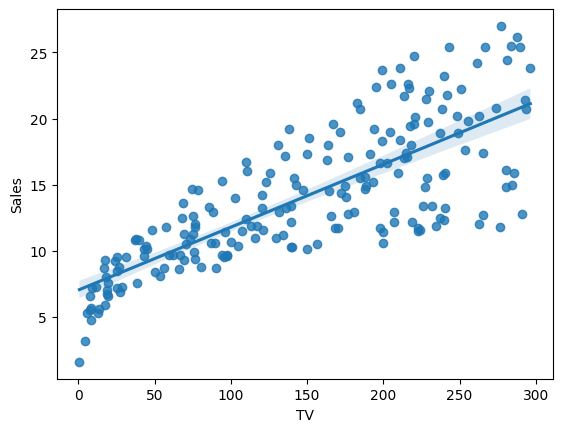

In [141]:
sns.regplot(x= X, y= y)

## Multiple linear regression

In [142]:
X, y = df.drop(columns="Sales"), df["Sales"]

X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [143]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [144]:
X.insert(0, "intercept", 1)

In [145]:
X.head()

,intercept,TV,Radio,Newspaper
0,1,230.1,37.8,69.2
1,1,44.5,39.3,45.1
2,1,17.2,45.9,69.3
3,1,151.5,41.3,58.5
4,1,180.8,10.8,58.4


In [146]:
X.T@X

,intercept,TV,Radio,Newspaper
intercept,200.0,29408.50,4652.80,6110.80
TV,29408.5,5791118.39,698061.98,919625.28
Radio,4652.8,698061.98,152107.86,164946.55
Newspaper,6110.8,919625.28,164946.55,281096.74


In [147]:
beta_hat = np.linalg.inv(X.T@X) @ X.T @ y
beta_hat

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [148]:
regression_fit = lambda X, y: np.linalg.inv(X.T@X) @ X.T @ y
beta_hat = regression_fit(X, y)
beta_hat

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [149]:
predict = lambda x, beta: np.dot(x, beta)

test_sample = [1, 230, 38, 69]

y_hat = predict(x=test_sample, beta=beta_hat)

print(y_hat)

20.557311447161773


## Train|test split

In [150]:
train_fraction = int(len(df)*0.7)

train = df.sample(n = train_fraction, random_state=42, replace= False)
train.head()

,TV,Radio,Newspaper,Sales
95,163.3,31.6,52.9,16.9
15,195.4,47.7,52.9,22.4
30,292.9,28.3,43.2,21.4
158,11.7,36.9,45.2,7.3
128,220.3,49.0,3.2,24.7


In [151]:
test = df.drop(train.index)
train.shape, test.shape

((140, 4), (60, 4))

In [152]:
X_trian, y_trian = train.drop(columns="Sales"), train["Sales"]
X_test, y_test = test.drop(columns="Sales"), test["Sales"]

X_trian.insert(0, "intercept", 1)
X_test.insert(0, "intercept", 1)

X_trian.shape, y_trian.shape, X_test.shape, y_test.shape

((140, 4), (140,), (60, 4), (60,))

## Prediction

In [159]:
beta_hat = regression_fit(X_trian, y_trian)
print(f"Beta parameters:\n {beta_hat}")

predict = lambda X, weights: X @ weights

beta_hat = np.reshape(beta_hat.to_numpy(), (4,1))

y_hat = predict(X_test, beta_hat).to_numpy()

y_hat[:5]

Beta parameters:
 0    2.956094
1    0.046793
2    0.187063
3   -0.004805
dtype: float64


array([[12.17324122],
       [12.19125728],
       [ 3.74653773],
       [ 8.90545078],
       [18.43980126]])

In [160]:
X_test.iloc[0]

intercept     1.0
TV           44.5
Radio        39.3
Newspaper    45.1
Name: 1, dtype: float64

## Evaluate model performance 

In [166]:
m = len(y_test)

y_hat = np.reshape(y_hat, (m))
y_hat.shape

(60,)

In [168]:
mae = 1/m*np.sum(np.abs(y_test-y_hat))
mse = 1/m*np.sum((y_test-y_hat)**2)
rmse = np.sqrt(mse)

mae, mse, rmse


(1.3244490959726571, 3.5404256182384954, 1.8816018755939035)